In [10]:
# import everything

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [66]:
# Helper function to run inference on a TFLite model
def run_tflite_model(image):
    # Initialize the interpreter
    interpreter = tf.lite.Interpreter(model_path="mnist_model_quant.tflite")
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    predictions = np.zeros((1,), dtype=int)
    test_image = image

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    test_image = np.array(test_image).astype(input_details["dtype"])

    print(input_details)
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    predictions = output.argmax()

    return predictions

In [88]:
import matplotlib.pylab as plt

## Helper function to test the models on one image
def test_model(image_path):
  image = plt.imread(image_path)
  image = tf.image.resize(image, (28, 28))
  image = image[:, :, 0]
  tmp = tf.reshape(image, [1, 784])
  predictions = run_tflite_model(tmp)

  plt.imshow(image)
  template = "True:{true}, Predicted:{predict}"
  _ = plt.title(template.format(true=str(image_path[0]), predict=str(predictions)))
  plt.grid(False)

{'name': 'flatten_input', 'index': 0, 'shape': array([  1, 784], dtype=int32), 'shape_signature': array([ -1, 784], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.003921568859368563, 0), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


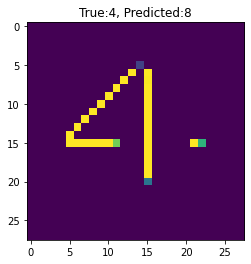

In [93]:
test_model("4.jpg")